# Tarea 2 - Fisica Computacional
#### Estudiante: Ignacio Vargas Cordero

### Ejercicio 1  

Realice un programa que encuentre todas las raices de una funcion en un intervalo cerrado bajo la suposicion de que la funcion realiza oscilaciones y entre cada oscilacion hay al menos una raiz. Ponga en practica esta funcion, y encuentre todas las raices de la siguiente funcion $y(x) = \cos{x} + \frac{6}{5} \sin{x^2}$ en el intervalo $(0,2\pi)$.

In [1]:
from pylab import *
%matplotlib inline

Esta es la funcion para la cual queremos encontrar las raices

In [3]:
def funcion1(x):
    return cos(x) + (6./5.)*sin(x**2)

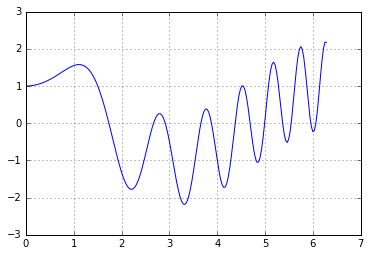

In [4]:
x=linspace(0,2*pi,200)
plot(x,funcion1(x))
grid(True)
show() 

Pondremos en practica la funcion vista en clase, "raiz_bip"  
#### Metodo de Biparticion:  
Dividimos el intervalo en 2 subintervalos de igual magnitud. Se retiene el subintervalo en donde f cambia de signo, conservando al menos una raíz o cero. Iteramos. Su desventaja es que es lento en cuanto a convergencia.

In [6]:
#Metodo de Biparticion con Argumentos y N_Max incluidos
def raiz_bip(func, x_i, x_d, args, n_max, err = 1e-5):
    raiz = 0.5*(x_i+x_d)
    y_i, y_d = func(x_i, args), func(x_d, args)
    n = 0
    while abs(y_i-y_d)>=err and n<n_max:
        n = n+1
        y_m = func(raiz, args)
        if y_m == 0:
            print "Le dimos a la raiz."
            break
        if y_m*y_i < 0:
            x_d = raiz
        else:
            x_i = raiz
        raiz = 0.5*(x_i+x_d)
        y_i,y_d = func(x_i, args),func(x_d, args)
        
    if n == n_max-1:
        return False, 0
    elif abs(func(raiz, args))<err:
        return True, raiz
    else:
        return False, 0

In [32]:
#Funcion de busqueda de raices
def busca_raices(func, xi, xd, args, n, N):
    
    # Se parte el intervalo en muchos pedazos 
    x = linspace(xi, xd, N)
    ArregloRaices = []
    # Se determina el error segun la particion de x que se elija
    err = min(1.0e-4, (xd-xi)/N)
    
    for i in range(len(x)-1):
        encontrar_raiz, raiz = raiz_bip(func, x[i], x[i+1], args, n, err)
        
        if encontrar_raiz:
            ArregloRaices.append(raiz)
            encontrar_raiz_inf, raices_inf = busca_raices(func, x[i], raiz-err, args, n, N)
            encontrar_raiz_sup, raices_sup = busca_raices(func, raiz+err, x[i+1], args, n, N)
            
            if encontrar_raiz_inf:
                ArregloRaices = ArregloRaices + raices_inf
            if encontrar_raiz_sup:
                ArregloRaices = ArregloRaices + raices_sup    

    if len(ArregloRaices)>0:
        return True, ArregloRaices
    else:
        return False, ArregloRaices

In [33]:
#Nos apoyamos de la funcion anterior para encontrar todas las raices
def todas_raices(func, xi, xd, args, n=50, N=10):
    m = 5
    lens = zeros(m)
    raices = []
    for i in range(1,m+1):
        #vamos agregando 
        val, raices_i = busca_raices(func, xi, xd, args, n, N+i-1)
        lens[i-1] = len(raices_i)
        raices.append(raices_i)
    max_len = amax(lens)
    
    if max_len==0:
        return 0
    for i in range(m):
        if lens[i] == max_len:
            return raices[i]

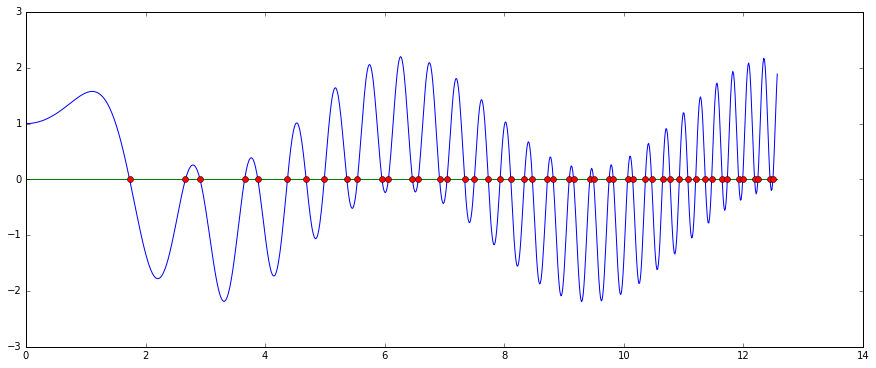

In [41]:
#Graficamos nuestra funcion1, pero con args
def funcion1_args(x, args):
    return cos(args*x)+1.2*sin(x*x)
    
fig = figure(figsize=(15,6))

N = 3
xi = 0
xd = 4*pi

x = linspace(xi, xd, 1000)
y = func_prueba(x,1)
plot(x, y, x, zeros_like(x))

raices = todas_raices(func_prueba, xi, xd, 1, 100, N)
if raices==0:
    print "no hay raices"
else:
    plot(raices, zeros_like(raices), 'o')

Obtenemos lo buscado: todas las raices de la funcion $y(x) = \cos{x} + \frac{6}{5} \sin{x^2}$ en el intervalo $(0,2\pi)$.

### Ejercicio 2

Se tiene la siguiente funcion:

$$f(x,y) = 2e^{-(x+1)^2} (e^{-(y+2)^2} + e^{-(y-2)^2}) + 6x(x^2 + y^2)e^{-(x^2+y^2)} - 1$$

Encuentre los puntos $(\hat{x},\hat{y})$ tales que $f(\hat{x},\hat{y})=0$ y dibuje estos puntos en el plano $xy$.

Hint: Como podra notar los puntos a buscar se encuentran en la region $x, y \in (-4,4) \times (4,4)$. Una forma de obtener los puntos es haciendo un barrido para x fija y encontrando todas las raices de la ecuacion en terminos de y. Entre mas fino haga el barrido, la curva de nivel que se encuentre sera mejor.

In [42]:
#declaramos la funcion de interes
def funcion2(y, x):
    return 2*exp(-(x+1)**2)*(exp(-(y+2)**2)+exp(-(y-2)**2)) + 6*x*(x**2+y**2)*exp(-(x**2+y**2))-1

In [55]:
#Definimos una nueva funcion para buscar raices en el plano bidimensional
def busca_raiz_2d(func, x_int, y_int, Res, N):
    x = arange(x_int[0], x_int[1]+Res, Res)
    raices_x = []
    raices_y = []
    for xi in x:
        raices_temp = todas_raices(func, y_int[0], y_int[1], xi, 50, N)
        if raices_temp!=0:
            for yi in raices_temp:
                raices_x.append(xi)
                raices_y.append(yi)
    return raices_x, raices_y

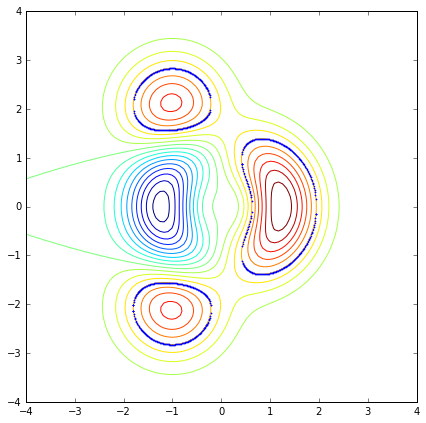

In [56]:
#Se grafican las raices para -4<x<4, -4<y<4
fig = figure(figsize=(7,7))
ax = fig.add_subplot(111)

x = linspace(-4,4,100)
y = linspace(-4,4,100)
X, Y = meshgrid(x, y)

f = funcion2(Y, X)
ax.contour(X, Y, f, 20)

raices = busca_raiz_2d(funcion2, [-4,4], [-4,4], 0.01, 3)
ax.plot(raices[0], raices[1], '.', markersize=2)

### Ejercicio 3

Se tiene una pelota de masa m sobre un plano inclinado a un angulo $\alpha = 15^{\circ}$, $30^{\circ}$ y $45^{\circ}$

1. Dibuje la trayectoria de la pelota si es lanzada desde el plano inclinado con una velocidad $v_{0x}, v_{0y} > 0$ considerando que hay friccion con el aire proporcional a la velocidad.
2. Realice la misma simulacion si ahora la fraccion es proporcional al cuadrado de la velocidad.
3. Que sucede si ahora la pelota es lanzada con velocidad inicial $v_{0x} < 0$ tal que $\tan^{-1}(\frac{v_{0y}}{v_{0x}}) > a$

Realice las graficas que representen las simulaciones. Puede suponer que $m = 1$ y valores adecuados para los coeficientes de friccion.

In [48]:
#Definimos una vez mas Runge-Kutta de orden 4 con argumentos, como visto en clase
def rk4(ec, p_ini, x, args=0, h=0.01):
    if x[1]-x[0] <= 5*h:
        h = abs(x[1]-x[0])/100
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    if args==0:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i])
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    else:
        for i in xrange(len(tiempos)-1): 
            k1 = ec(sol[i,:],tiempos[i],args)
            k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args) 
            k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args) 
            k4 = ec(sol[i,:]+h*k3,tiempos[i]+h,args) 
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) 
    return tiempos,sol

In [49]:
#Definimos la ecuacion de movimiento
def e_mov(r_v, t, fric=0, g=9.8, m=1):
    dx = r_v[2] 
    dy = r_v[3]
    if fric==0:
        dvx,dvy = 0, -(g/m)
    else:
        dvx = -  fric([r_v[2],r_v[3]])[0]
        dvy = -(g/m) - fric([r_v[2],r_v[3]])[1]
    return array([dx,dy,dvx,dvy])

#Definimos la friccion proporcional a la velocidad
def fric_v(v,gamma=0.1): 
    f_x = gamma*v[0]
    f_y = gamma*v[1]
    return array([f_x,f_y])

#Definimos la friccion proporcional al cuadrado de la velocidad
def fric_v2(v,gamma=0.1): 
    norm_v = sqrt(v[0]**2 + v[1]**2)
    f_x = gamma*norm_v*v[0]
    f_y = gamma*norm_v*v[1]
    return array([f_x,f_y])

In [18]:
def evolucion(p, alpha, fric, N=100, mi_dt=0.1):
    #Trabajamos con radianes
    alpha_rad = pi*alpha/180.
    # se define un arreglo vacio donde se ira guardando la trayectoria
    trayectoria = zeros((N,len(p)))
    # se incluye la condicion inicial a la trayectoria
    trayectoria[0,:] = array(p)
    for i in range(N-1):
        # se resuelve la ecuacion de movimiento en un delta t
        t, sol = rk4(e_mov,trayectoria[i,:],[0,mi_dt],fric)

        # si la solucion esta por debajo de la recta
        if sol[-1,1] < trayectoria[0,1] - tan(alpha_rad)*sol[-1,0]:
            # se refina el paso temporal para buscar donde debe de rebotar
            dt_busqueda = mi_dt/2
            # se calcula el la trayectoria desde el punto anterior dt_busqueda
            y_izq = trayectoria[i,:]
            t, sol = rk4(e_mov,trayectoria[i,:],[0,dt_busqueda],fric)
            y_med = sol[-1,:]

            # se repite el proceso hasta que se encuenta el punto de rebote
            while abs(y_izq[1]-(trayectoria[0,1] - tan(alpha_rad)*y_izq[0]))>1e-5:
                # se refina el paso temporal
                dt_busqueda = dt_busqueda/2
                # se determina en que intervalo temporal ocurrio el rebote
                if (y_izq[1]-(trayectoria[0,1] - tan(alpha_rad)*y_izq[0]))*(y_med[1]-(trayectoria[0,1] - tan(alpha_rad)*y_med[0])) < 0:
                    reinicio = y_izq
                else:
                    reinicio = y_med
                # se calcula la nueva trayectoria
                t, sol = rk4(e_mov,reinicio,[0,dt_busqueda], fric)

                y_izq = reinicio
                y_med = sol[-1,:]
                
            # se ponen las condiciones de rebote
            m = array([[1,0,0,0],[0,1,0,0],
                       [0,0, cos(2*alpha_rad), -sin(2*alpha_rad)],[0,0, -sin(2*alpha_rad), -cos(2*alpha_rad)]])
            
            trayectoria[i+1,:] = dot(m, y_izq)
            
        else:
            # si aun no pasa la recta donde rebota pues continua con el calculo de la trayectoria
            trayectoria[i+1,:] = sol[-1,:]
    return trayectoria

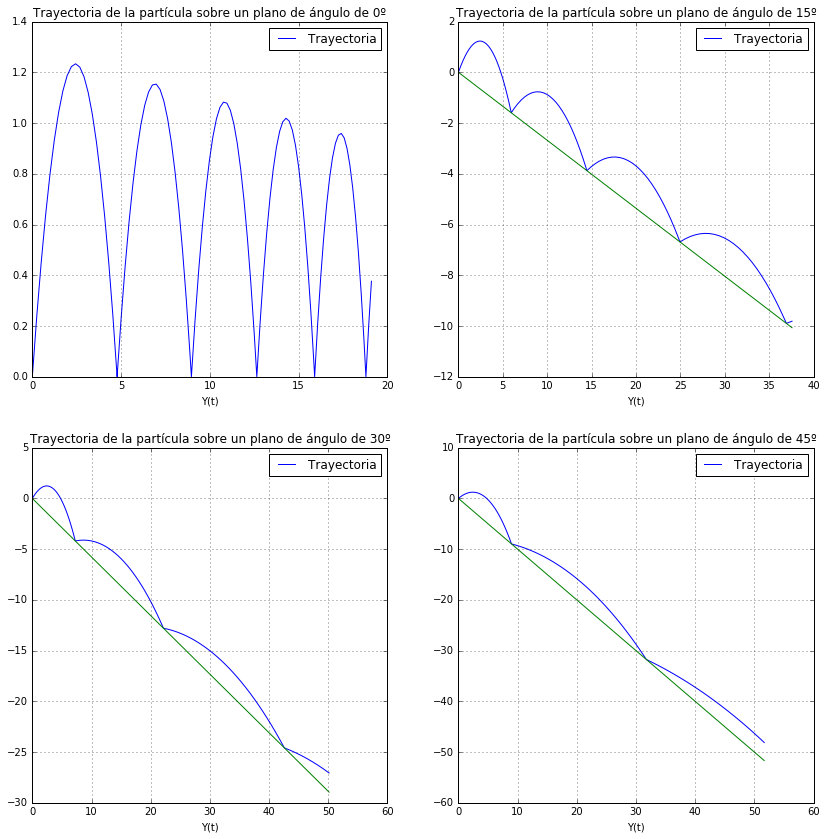

In [19]:
fig = figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

graphs = [ax, bx, cx, dx]

# se pone una condicion inicial
p = [0,0,5,5]
alpha = array([0,15,30,45])
alpha_rad = pi*alpha/180

for i in range(len(alpha)):
    trayectoria = evolucion(p, alpha[i], fric_v, N=100, mi_dt=0.05)
    # se grafica la solucion
    x = linspace(amin(trayectoria[:,0]), amax(trayectoria[:,0]), 100)
    # se calcula el plano donde esta la particula suponiento que en t=0, esta sobre el plano
    y_plano = trayectoria[0,1]*ones(len(x)) - tan(alpha_rad[i])*x

    graphs[i].plot(trayectoria[:,0],trayectoria[:,1], label=u"Trayectoria")
    graphs[i].plot(x, y_plano)
    graphs[i].legend()
    graphs[i].set_title(u"Trayectoria de la partícula sobre un plano de ángulo de "+str(alpha[i])+u"º")
    graphs[i].set_xlabel("X")
    graphs[i].set_xlabel("Y(t)")
    graphs[i].grid(True)

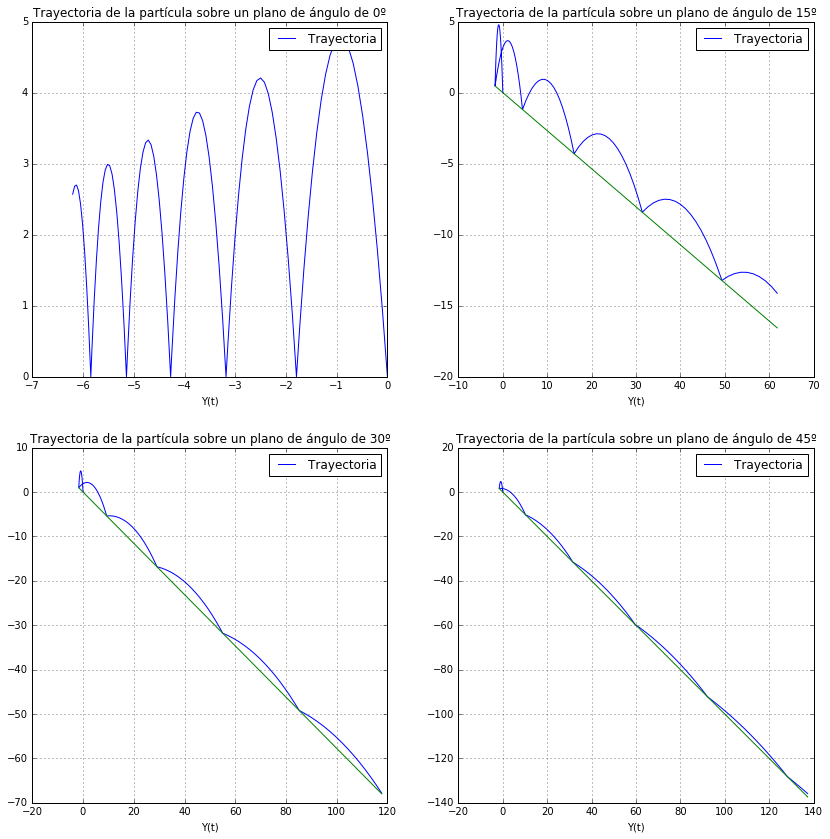

In [47]:
fig = figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)
dx = fig.add_subplot(224)

graphs = [ax, bx, cx, dx]

# se pone una condicion inicial
p = [0,0,-1,10]
alpha = array([0,15,30,45])
alpha_rad = pi*alpha/180

for i in range(len(alpha)):
    trayectoria = evolucion(p, alpha[i], fric_v, N=100, mi_dt=0.1)
    # se grafica la solucion
    x = linspace(amin(trayectoria[:,0]), amax(trayectoria[:,0]), 100)
    # se calcula el plano donde esta la particula suponiento que en t=0, esta sobre el plano
    y_plano = trayectoria[0,1]*ones(len(x)) - tan(alpha_rad[i])*x

    graphs[i].plot(trayectoria[:,0],trayectoria[:,1], label=u"Trayectoria")
    graphs[i].plot(x, y_plano)
    graphs[i].legend()
    graphs[i].set_title(u"Trayectoria de la partícula sobre un plano de ángulo de "+str(alpha[i])+u"º")
    graphs[i].set_xlabel("X")
    graphs[i].set_xlabel("Y(t)")
    graphs[i].grid(True)